# Finding the Best Markets to Advertise In
We're working for an e-learning company that offers courses on programming. The domain of our courses are : web and mobile development, data science, game development, etc. Now we have a purpose to promote our product and invest some money in advertisement so we should find out the two best markets to advertise our product in.

## 1- Understanding the Data
To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey]('https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/'). [freeCodeCamp]('https://www.freecodecamp.org') is a free e-learning platform that offers courses on web development. Because they run [a popular Medium publication]('https://www.freecodecamp.org/news/') (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository]('https://github.com/freeCodeCamp/2017-new-coder-survey'). Below, we'll do a quick exploration of the 2017-fCC-New-Coders-Survey-Data.csv file stored in the clean-data folder of the repository we just mentioned. We'll read in the file using the direct link [here]('https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv').

In [56]:
import pandas as pd

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
print(data.shape)
data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2- Checking for Sample Representativity
Keeping in mind our purpose, we should answer those question about a *population* of new coders that are interested in the subjects we teach. We'd like to know:
- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Let's figure out if the sample we have is representative for our population of interest.

In [57]:
#Frequency distribution
frequencies = data['JobRoleInterest'].value_counts(normalize=True) * 100
frequencies

Full-Stack Web Developer                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                  6.435927
  Data Scientist                                                                                                                           2.173913
Back-End Web Developer                                                                                                                     2.030892
  Mobile Developer                                                                                                                         1.673341
                                                                                                                                            ...    
Back-End Web Developer,   Mobile Developer,   Front-End Web Developer, Game Developer,   Product Manager        

By the result, we can say :
- Most of the people are interested in only one subject as *Full-Stack Web Developer*, *Front-End Web Developer*, *Data Scientist*, *Back-End Web Developer*, *Mobile Developer*
- Few people are interested in Mobile development
- Few people have other interest on other domain than web and mobile development

In [58]:
# How many people are interested in at least one of these two subjects?
interest_no_null = data['JobRoleInterest'].dropna()
interests_split = interest_no_null.str.split(',')
# number of job option
number_job_option = interests_split.apply(lambda x: len(x))
number_job_option.value_counts(normalize=True) *100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

The frequencies show us only  *31.65%* of the user have a clear idea on what they want to study, the remaining have mixed interest. The fact we're focus on web and mobile development, so let's find out how many people are intested in one or two subjects.  

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


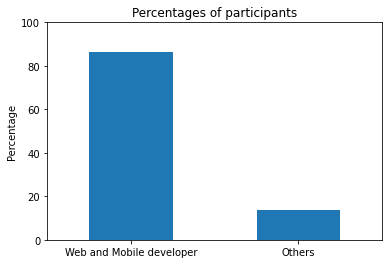

In [59]:
# get the data of our subjects
subjects = interest_no_null.str.contains("Mobile Developer|Web Developer")
# frequency of our subjets
freq_subjects = subjects.value_counts(normalize = True)* 100
print(freq_subjects)

import matplotlib.pyplot as plt
freq_subjects.plot.bar()
plt.title("Percentages of participants")
plt.xticks([0,1],["Web and Mobile developer","Others"],rotation=0)
plt.ylabel("Percentage")
plt.ylim([0,100])
plt.show()

The plot shows clearly that the participant are more interested in Web and Mobile development. This result offer us a strong reason to consider this sample representative for our population of interest.

## 3- New Coders - Locations and Densities
For this part, we're going to find out where new coders are located and what are the densities for each location.
For this analysis , we'll work with the *CountryLive* variable because we're interested where people actualy live at the moment when we run the ads.The goal is two find the two best countries to advertise in.

In [60]:
# having the participants that answered what role they'd interested in
participants = data[data["JobRoleInterest"].notnull()].copy()
#print(new_coder.shape)

# CHECK THE ABSOLUTE AND RELATIVE FREQUENCIES
abs_freq = participants["CountryLive"].value_counts()
rel_freq = participants["CountryLive"].value_counts(normalize=True)*100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': abs_freq,
                    'Percentage':rel_freq})


,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Panama,1,0.014624
Liberia,1,0.014624


By the results, we can see that *United States of America, India, United Kingdom, Canada, Brazil* are the countries where there is more participants. Just based on this results, *United States of America* and *India* are the two best markets you'd coose for advertisement. But we we can't stop the analysis here, we need to go more in depth to be sure on this choice.

## 4- Spending Money for Learning
Before taking a decision, let's go in depth by figuring out how much money new coders are actually willing to spend on learning. It's not profitable for us to advertise in markets where most people are willing to learn for free. 

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of 59 dollars per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [61]:
# Replace in MonthsProgramming column 0 by 1
participants['MonthsProgramming'].replace(0,1, inplace=True)
# Calculate the amount of money a student has spent per month
participants['MoneyPerMonth'] = participants['MoneyForLearning'] / participants['MonthsProgramming']
# How many null values there are in the new column
print("The number of null values: {}".format(participants['MoneyPerMonth'].isnull().sum()))

# Remove any rows that have null values in 'MoneyPerMonth' and 'CountryLive'
participants = participants[participants["MoneyPerMonth"].notnull()]
participants = participants[participants["CountryLive"].notnull()]
# Checking if we have enough data 
participants['CountryLive'].value_counts().head()

The number of null values: 675


United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

Let's find out now how much money a student spends on average each month in  the US, India, the United Kingdom and Canada.

In [62]:
countries = ['United States of America','India','United Kingdom','Canada']
countries_mean = participants.groupby(['CountryLive']).mean()
countries_mean['MoneyPerMonth'][countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

Analyzing the result, we can say the two best markets are United States of America and India because in those location the new coders spend more money for learning. But there is a surprise if we considered a few socio-economical metrics (like [GDP per capital](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## 5- Dealing with Extreme Outliers
Let's use the box plots to visualize the distribution of the money_per_month variable for each country.

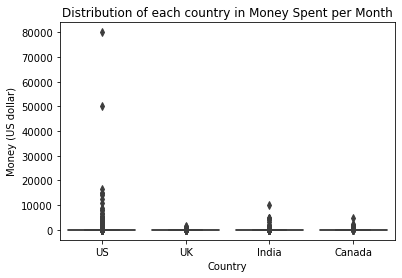

In [63]:
# Extract the 4 countries
only_4 = participants[participants['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(x='CountryLive',y='MoneyPerMonth', data=only_4)
plt.title("Distribution of each country in Money Spent per Month")
plt.xlabel('Country')
plt.ylabel('Money (US dollar)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()


With the plot , it's difficult to see on the plot if there's anything wrong with the data for UK, India or canada. We can see on the plot of US there are outliers and it's not impossible but it seems extremely unlikely, so we are going to remove every value that goes over \$20,000 per month.

In [64]:
# delete the outliers
participants = participants[participants['MoneyPerMonth']< 20000]
#Let's recompute the means 
countries_mean = participants.groupby(['CountryLive']).mean()
countries_mean['MoneyPerMonth'][countries]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

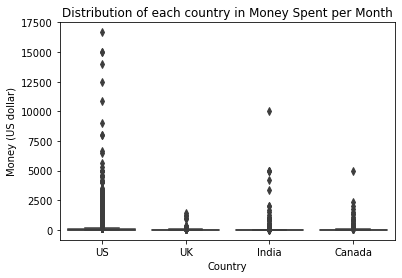

In [65]:
# Extract the 4 countries
only_4 = participants[participants['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(x='CountryLive',y='MoneyPerMonth', data=only_4)
plt.title("Distribution of each country in Money Spent per Month")
plt.xlabel('Country')
plt.ylabel('Money (US dollar)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()


We can see a few outliers for India (values over \$2500 per month), but it's not justify whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data point to see if we can find anything relevant.

In [66]:
outliers_india = only_4 [(only_4['CountryLive']==countries[1])&(only_4['MoneyPerMonth']>=2500)]
outliers_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp so the data can be wrong then we should deleted those rows.

In [67]:
# remove the outliers for India
only_4 = only_4.drop(outliers_india.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6000 per month). let's examine in more details.

In [68]:
# extract the outliers of US
outliers_us = only_4[(only_4['CountryLive']==countries[0])&(only_4['MoneyPerMonth']>=6000)]
outliers_us

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:
- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [69]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[(only_4['CountryLive'] == countries[0]) &
(only_4['MoneyPerMonth']>= 6000) & (only_4['AttendedBootcamp'] == 0)]
only_4 = only_4.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[(only_4['CountryLive'] == countries[0])&
(only_4['MoneyPerMonth']>= 6000) & (only_4['MonthsProgramming']<=3)]
only_4 = only_4.drop(less_than_3_months.index)

Looking again at the last box, we can notice an extreme outlier for Canada. we have a person who spends roughly \$5000 per month. Let's examin this person in more depth.

In [70]:
outliers_canada = only_4[(only_4['CountryLive']==countries[3]) & (only_4['MoneyPerMonth']>4500)]
outliers_canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


We've a similar situation as some of the US respondent. This participant had been programming for no more than two  months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [71]:
# Remove the outliers
only_4 = only_4.drop(outliers_canada.index)
# Let's recompute the mean 
only_4.groupby(['CountryLive']).mean()['MoneyPerMonth']


CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

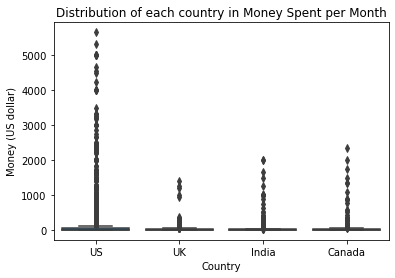

In [72]:
# Visualize our final data 
sns.boxplot(x='CountryLive',y='MoneyPerMonth', data=only_4)
plt.title("Distribution of each country in Money Spent per Month")
plt.xlabel('Country')
plt.ylabel('Money (US dollar)')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

## 6- Choosing the Two Best Markets
By the result above, we can confirm the first best market is the **US** because there are a lot of new coders living there and they are willing to pay a good amount of money each month (roughly \$143).

Knowing that we sell subscription at \$59 per month, Canada seems to be the best second choice because there people are willing to pay roughly \$93 per month compared to India \$66 and UK \$45.

Let's go in depth to decide our second market between Canada and India


In [73]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize =True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
   
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.
2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
   
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.
3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solide conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.